In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import models, layers
import numpy as np

In [ ]:
DATA_DIR = "./data"      # your folder with breed subfolders
IMG_SIZE = (200, 200)
BATCH_SIZE = 64
EPOCHS = 20
INPUT_SHAPE = IMG_SIZE + (3,) 
VAL_SPLIT = 0.3

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR+'/train',
    subset="training",
    validation_split=VAL_SPLIT,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",  
    shuffle=True,    
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR+'/train',
    subset="validation",
    validation_split=VAL_SPLIT,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary",  
    shuffle=False,    
)
    

Found 9605 files belonging to 2 classes.
Using 6724 files for training.
Found 9605 files belonging to 2 classes.
Using 2881 files for validation.


In [21]:
class_names = train_ds.class_names
num_classes = len(class_names)

In [22]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [23]:
# train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))


In [24]:
def create_model():
    units = num_classes if num_classes > 2 else 1
    model = tf.keras.Sequential([
        layers.Rescaling(1./255, input_shape=INPUT_SHAPE),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5), 
        
        layers.Dense(units, activation='sigmoid')
    ])
    
    return model

In [25]:
model = create_model()
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,895,553 (11.05 MB)

 Trainable params: 2,895,553 (11.05 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS, 
)

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 76s 699ms/step - accuracy: 0.7335 - loss: 0.5156 - val_accuracy: 0.7893 - val_loss: 0.4272
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 72s 683ms/step - accuracy: 0.8489 - loss: 0.3469 - val_accuracy: 0.8511 - val_loss: 0.2993
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 73s 684ms/step - accuracy: 0.8725 - loss: 0.3073 - val_accuracy: 0.7931 - val_loss: 0.4323
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 73s 691ms/step - accuracy: 0.8824 - loss: 0.2801 - val_accuracy: 0.8431 - val_loss: 0.3335
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 72s 683ms/step - accuracy: 0.8849 - loss: 0.2743 - val_accuracy: 0.7876 - val_loss: 0.4166
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 72s 678ms/step - accuracy: 0.8932 - loss: 0.2607 - val_accuracy: 0.8980 - val_loss: 0.2298
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 72s 680ms/step - accuracy: 0.8968 - loss: 0.2433 - val_accuracy: 0.8733 - val_loss: 0.2732
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 72s 683ms/step - accuracy: 0.8965 - loss: 0

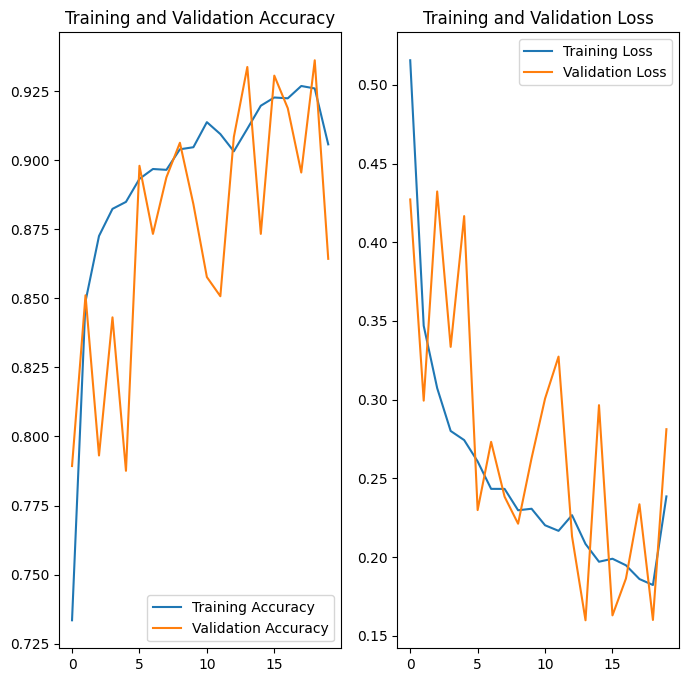

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('20-11-3.keras')

In [29]:
loss, acc = model.evaluate(val_ds)  # or val_ds
print('Acc: ', acc)

46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.8643 - loss: 0.2812
Acc:  0.8642832636833191


In [30]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR + '/test',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary',
    shuffle=False,      # IMPORTANT
)
file_paths = test_ds.file_paths


Found 1000 files belonging to 2 classes.


In [31]:
def evaluate_binary_test_set_with_files(model, test_ds):

    total = 0
    correct = 0
    wrong_samples = []   # (file_path, true_label, pred_label, prob)

    file_paths = test_ds.file_paths  # relies on shuffle=False
    idx = 0

    for batch_images, batch_labels in test_ds:
        batch_size = batch_images.shape[0]

        # true labels: squeeze to shape (batch,)
        batch_labels = tf.squeeze(batch_labels)

        # predict probabilities
        probs = model.predict(batch_images, verbose=0)   # (batch,1) or (batch,)
        probs = tf.squeeze(probs)

        # threshold
        pred_labels = tf.cast(probs >= 0.5, tf.int32)
        true_labels = tf.cast(batch_labels, tf.int32)

        # accuracy counting
        matches = tf.cast(pred_labels == true_labels, tf.int32)
        correct += int(tf.reduce_sum(matches).numpy())
        total += batch_size

        # collect wrong ones
        for i in range(batch_size):
            if matches[i] == 0:
                wrong_samples.append((
                    file_paths[idx + i],
                    int(true_labels[i].numpy()),
                    int(pred_labels[i].numpy()),
                    float(probs[i].numpy())
                ))

        idx += batch_size

    accuracy = correct / total if total > 0 else 0.0
    print(f"Test accuracy: {accuracy:.4f}  ({correct}/{total})")

    if wrong_samples:
        print("\nMisclassified images:")
        for path, t, p, prob in wrong_samples:
            print(f"- {path} | true={t}, pred={p}, prob={prob:.3f}")
    else:
        print("\nNo misclassified images 🎉")

    return accuracy, wrong_samples

In [32]:
acc, loss = evaluate_binary_test_set_with_files(model, test_ds)
print('acc', acc)
print('loss', loss)

Test accuracy: 0.9020  (902/1000)

Misclassified images:
- ./data/test\benign\melanoma_10007.jpg | true=0, pred=1, prob=0.728
- ./data/test\benign\melanoma_10008.jpg | true=0, pred=1, prob=0.841
- ./data/test\benign\melanoma_10025.jpg | true=0, pred=1, prob=0.589
- ./data/test\benign\melanoma_10042.jpg | true=0, pred=1, prob=0.714
- ./data/test\benign\melanoma_10050.jpg | true=0, pred=1, prob=0.772
- ./data/test\benign\melanoma_10080.jpg | true=0, pred=1, prob=0.612
- ./data/test\benign\melanoma_10091.jpg | true=0, pred=1, prob=0.828
- ./data/test\benign\melanoma_10095.jpg | true=0, pred=1, prob=0.554
- ./data/test\benign\melanoma_10102.jpg | true=0, pred=1, prob=0.550
- ./data/test\benign\melanoma_9612.jpg | true=0, pred=1, prob=0.669
- ./data/test\benign\melanoma_9615.jpg | true=0, pred=1, prob=0.579
- ./data/test\benign\melanoma_9621.jpg | true=0, pred=1, prob=0.966
- ./data/test\benign\melanoma_9622.jpg | true=0, pred=1, prob=0.603
- ./data/test\benign\melanoma_9636.jpg | true=0, p